In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from fbprophet import Prophet
import pmdarima as pm
import math

Importing plotly failed. Interactive plots will not work.


In [2]:
industrials_sector_pd = pd.read_csv('KU_industrials_sector_report.csv')
industrials_sector_pd['date'] = pd.to_datetime(industrials_sector_pd['date'])

In [3]:
industrials_sector_pd = industrials_sector_pd.set_index('date')

In [5]:
df_ch_robinson = industrials_sector_pd[['chrobinson']]

Text(0.5, 1.0, 'CH Robinson Closing Pric')

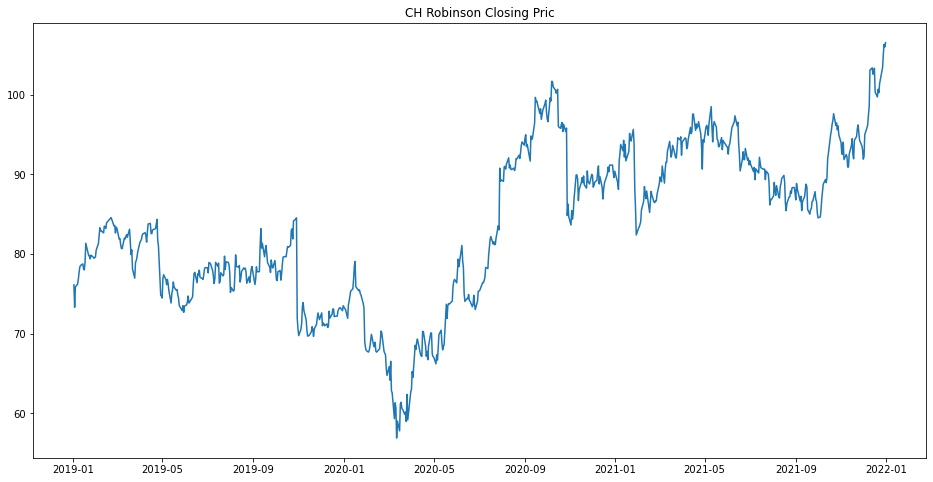

In [6]:
#plot
plt.figure(figsize=(16,8))
plt.plot(industrials_sector_pd['chrobinson'], label='Close Price History')
plt.title('CH Robinson Closing Pric')

Text(0.5, 1.0, 'S&P Closing Price')

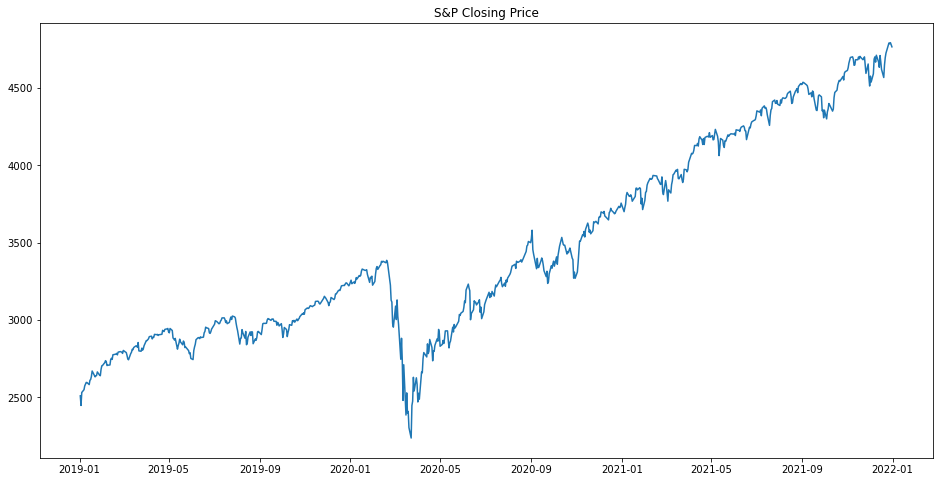

In [8]:
plt.figure(figsize=(16,8))
plt.plot(industrials_sector_pd['spstock'], label='Close Price History')
plt.title('S&P Closing Price')

Text(0.5, 1.0, 'Industrials Closing Price')

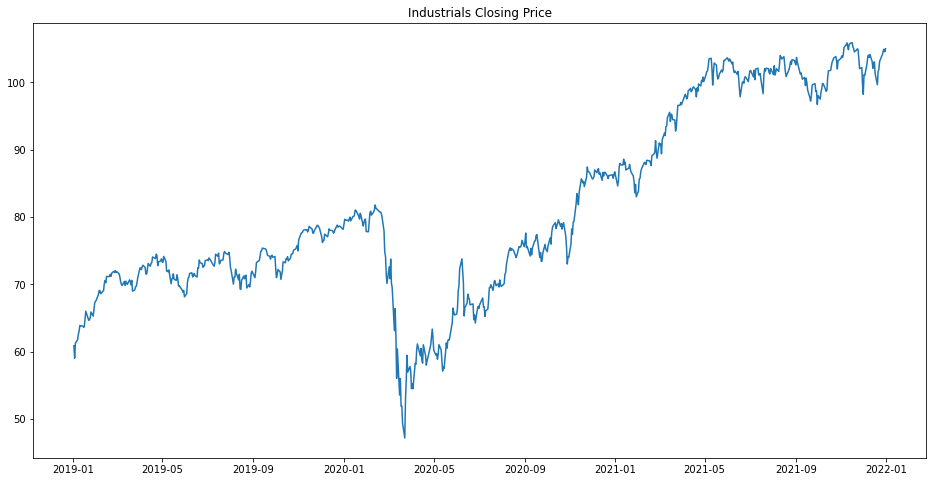

In [7]:
plt.figure(figsize=(16,8))
plt.plot(industrials_sector_pd['industrial_sector'], label='Close Price History')
plt.title('Industrials Closing Price')

<AxesSubplot:ylabel='Density'>

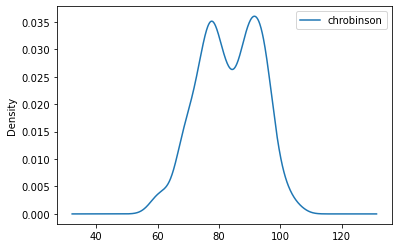

In [9]:
df_ch_robinson_close = df_ch_robinson[['chrobinson']]
df_ch_robinson_close.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

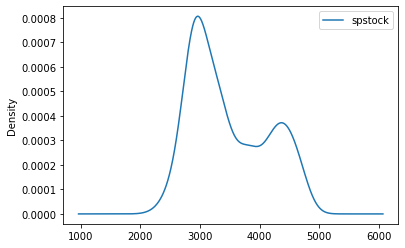

In [10]:
df_sp_close = industrials_sector_pd[['spstock']]
df_sp_close.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

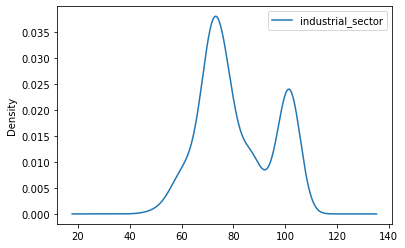

In [13]:
df_industrials_close = industrials_sector_pd[['industrial_sector']]
df_industrials_close.plot(kind='kde')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

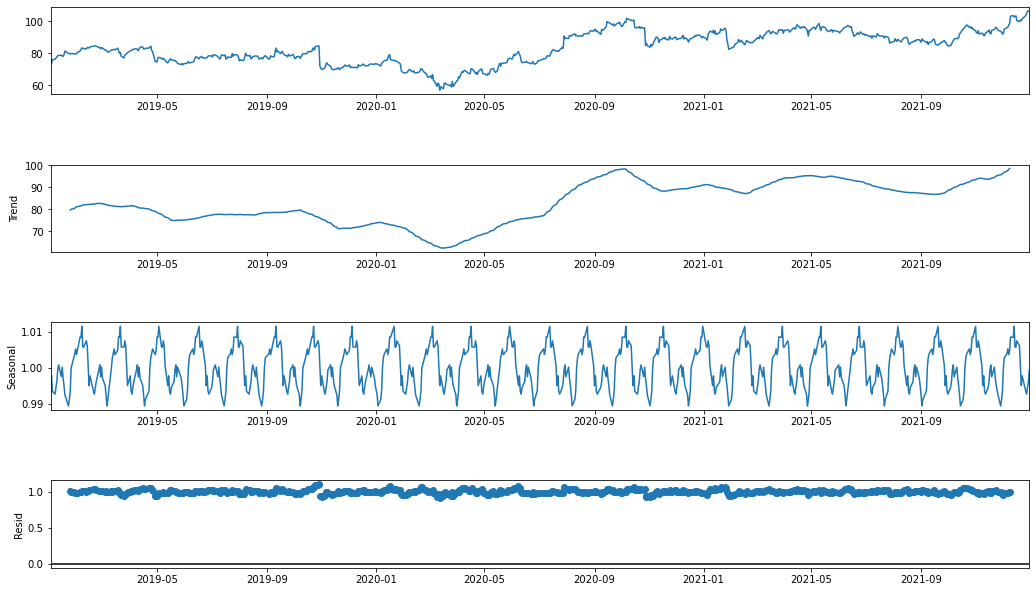

In [14]:
#Looking at trend and seasonality from time series
result = seasonal_decompose(df_ch_robinson_close, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

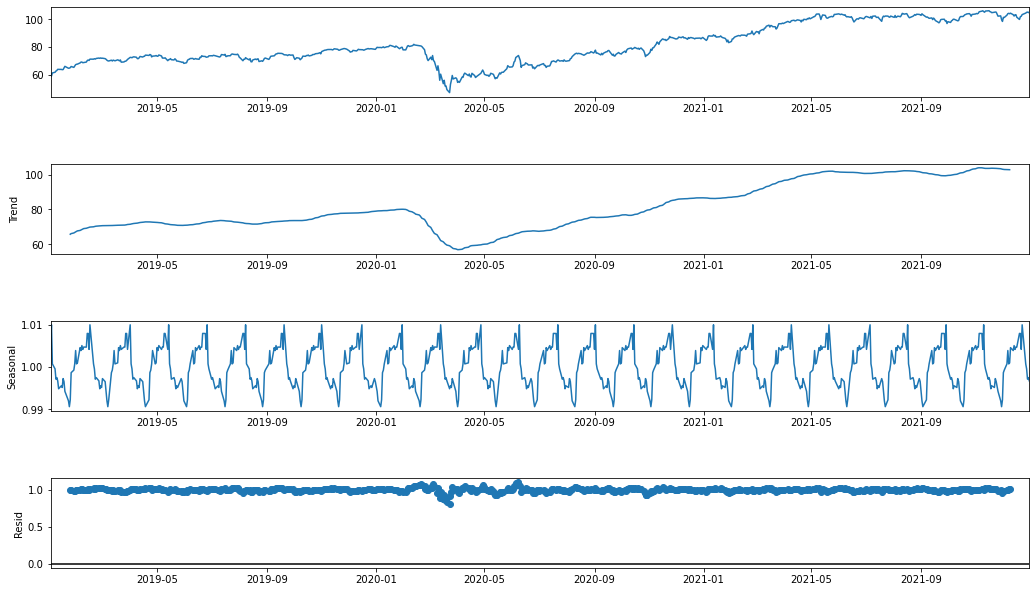

In [15]:
#Looking at trend and seasonality from time series
result = seasonal_decompose(df_industrials_close, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

Since data is not stationary we will preform log transformation to eliminate trend

In [16]:
df_ch_robinson_log = np.log(df_ch_robinson_close)

In [17]:
df_industrials_log = np.log(df_industrials_close)

Split data into train and test sets

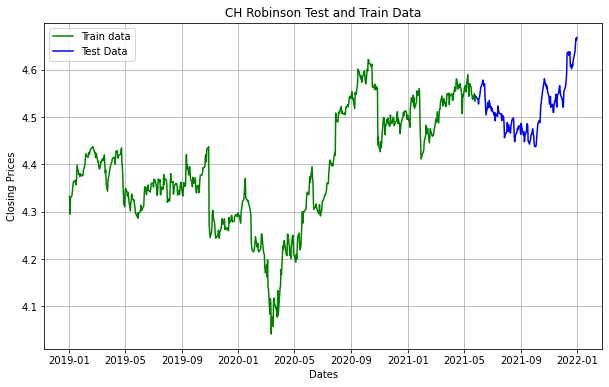

In [18]:
ch_robinson_train_data= df_ch_robinson_log.iloc[:int(df_ch_robinson_log.shape[0]*0.8)]
ch_robinson_test_data = df_ch_robinson_log.iloc[int(df_ch_robinson_log.shape[0]*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(ch_robinson_train_data, 'Green', label='Train data')
plt.plot(ch_robinson_test_data, 'blue',  label='Test Data')
plt.title('CH Robinson Test and Train Data')
plt.legend()

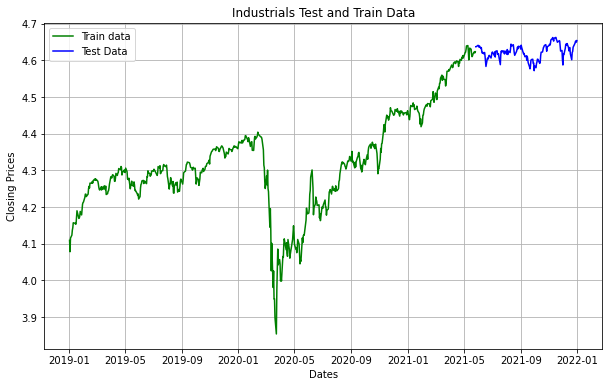

In [19]:
industrials_train_data= df_industrials_log.iloc[:int(df_industrials_log.shape[0]*0.8)]
industrials_test_data = df_industrials_log.iloc[int(df_industrials_log.shape[0]*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(industrials_train_data, 'Green', label='Train data')
plt.plot(industrials_test_data, 'blue',  label='Test Data')
plt.title('Industrials Test and Train Data')
plt.legend()

This Machine Learning Model will run a linear regression, ARIMA, and a Facebook Prophet Model
-some limitations of these models will be they do not take into accoutn current world sitations (like COVID impacts on the economy)

Linear Regression Model

In [20]:
df_linear_ch_robinson = industrials_sector_pd[['chrobinson', 'spstock']]

In [21]:
df_linear_industrial = industrials_sector_pd[['industrial_sector', 'spstock']]

In [23]:
# for linear regression model we need an x_train value, and a y_train value
X_train, X_test, y_train, y_test = train_test_split(df_linear_ch_robinson[['chrobinson']], df_linear_ch_robinson[['spstock']], test_size=.2)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error Statistics for CH Robinson Linear Regression')
print('MSE: ' + str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: ' + str(mape))

Error Statistics for CH Robinson Linear Regression
MSE: 195464.12529837582
MAE: 359.1913227014084
RMSE: 442.11324940378773
MAPE: spstock    0.100919
dtype: float64


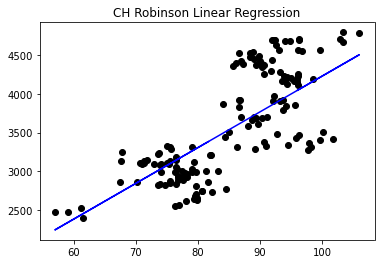

In [24]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue')
plt.title('CH Robinson Linear Regression')
plt.show()

In [25]:
# for linear regression model we need an x_train value, and a y_train value
X_train, X_test, y_train, y_test = train_test_split(df_linear_industrial[['industrial_sector']], df_linear_ch_robinson[['spstock']], test_size=.2)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error Statistics for Industrials Linear Regression')
print('MSE: ' + str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: ' + str(mape))

Error Statistics for Industrials Linear Regression
MSE: 30208.71359501892
MAE: 152.07704326298176
RMSE: 173.80654071414838
MAPE: spstock    0.046915
dtype: float64


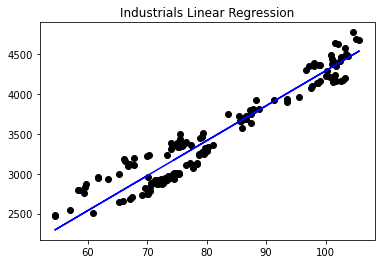

In [26]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue')
plt.title('Industrials Linear Regression')
plt.show()

ARIMA Model


In [27]:
#Determining optimal parameters
arima_model_param = pm.auto_arima(ch_robinson_train_data, d=1, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=6, max_order=None , trace=True)

arima_model_param.fit(ch_robinson_train_data)

Performing stepwise search to minimize aic


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3096.381, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3096.565, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3099.258, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3098.731, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3098.347, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3099.635, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3100.225, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-3099.772, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3098.352, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3098.591, Time=0.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-3097.795, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-3101.962, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-3101.401, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-3101.469, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-3100.118, Time=0.10

ARIMA(order=(3, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [28]:
#Modeling
arima_model = ARIMA(ch_robinson_train_data, order=(3,1,0))
arima_fitted = arima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.57469D+00    |proj g|=  2.50196D-02

At iterate    5    f= -2.57470D+00    |proj g|=  6.99172D-02

At iterate   10    f= -2.57470D+00    |proj g|=  3.32445D-04

At iterate   15    f= -2.57470D+00    |proj g|=  4.18052D-03

At iterate   20    f= -2.57470D+00    |proj g|=  3.68594D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     31      1     0     0   3.686D-06  -2.575D+00
  F =  -2.5747022107093485     

CONVERG

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

In [29]:
#Forecast
arima_forecast, se, conf = arima_fitted.forecast(len(ch_robinson_test_data), alpha=0.05)

arima_fc_series = pd.Series(arima_forecast, index=ch_robinson_test_data.index)
lower_series = pd.Series(conf[:,0], index=ch_robinson_test_data.index)
upper_series = pd.Series(conf[:,1], index=ch_robinson_test_data.index)

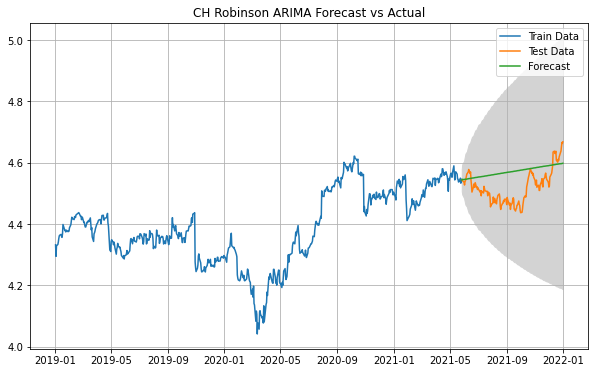

In [33]:
#ARIMA Plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ch_robinson_train_data, label='Train Data')
plt.plot(ch_robinson_test_data, label='Test Data')
plt.plot(arima_fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='lightgrey')
plt.title('CH Robinson ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [34]:
# ARIMA Model Statistics
mse = mean_squared_error(ch_robinson_test_data, arima_forecast)
print('Error Statistics for CH Robinson ARIMA Model')
print('MSE: ' + str(mse))
mae = mean_absolute_error(ch_robinson_test_data, arima_forecast)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(ch_robinson_test_data, arima_forecast))
print('RMSE: '+str(rmse))

Error Statistics for CH Robinson ARIMA Model
MSE: 0.0048492178818794005
MAE: 0.05978247485420217
RMSE: 0.06963632587866336


In [35]:
#Determining optimal parameters
arima_model_param = pm.auto_arima(industrials_train_data, d=1, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=6, max_order=None , trace=True)

arima_model_param.fit(industrials_train_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3190.923, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3141.791, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3151.148, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3148.372, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3142.423, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3166.761, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3162.429, Time=0.37 sec


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3199.858, Time=0.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3160.815, Time=0.12 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-3184.870, Time=0.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-3163.940, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-3164.961, Time=0.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-3211.747, Time=0.56 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-3172.684, Time=0.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-3211.622, Time=0.65 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3162.706, Time=0.24 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-3179.017, Time=0.30 sec


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-3212.330, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-3162.786, Time=0.30 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-3172.913, Time=0.10 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-3212.300, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-3198.452, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-3163.337, Time=0.16 sec


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-3211.727, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-3179.593, Time=0.10 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=-3190.853, Time=0.58 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 9.446 seconds


ARIMA(order=(4, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [36]:
#Modeling
arima_model = ARIMA(industrials_train_data, order=(4,1,1))
arima_fitted = arima_model.fit()

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67077D+00    |proj g|=  2.85684D-01

At iterate    5    f= -2.67078D+00    |proj g|=  5.73702D-02

At iterate   10    f= -2.67081D+00    |proj g|=  1.50989D-01

At iterate   15    f= -2.67082D+00    |proj g|=  2.73483D-02

At iterate   20    f= -2.67082D+00    |proj g|=  7.79501D-03

At iterate   25    f= -2.67083D+00    |proj g|=  2.72105D-02

At iterate   30    f= -2.67083D+00    |proj g|=  3.82387D-03

At iterate   35    f= -2.67083D+00    |proj g|=  2.73547D-02

At iterate   40    f= -2.67083D+00    |proj g|=  1.10825D-02

At iterate   45    f= -2.67084D+00    |proj g|=  6.21860D-02

At iterate   50    f= -2.67084D+00    |proj g|=  5.62044D-03

At iterate   55    f= -2.67084D+00    |proj g|=  1.24447D-03

At iterate   60    f= -2.67084D+00    |proj g|=  1.55431D-06

           * * *

Tit   = 

In [37]:
#Forecast
arima_forecast, se, conf = arima_fitted.forecast(len(industrials_test_data), alpha=0.05)

arima_fc_series = pd.Series(arima_forecast, index=industrials_test_data.index)
lower_series = pd.Series(conf[:,0], index=industrials_test_data.index)
upper_series = pd.Series(conf[:,1], index=industrials_test_data.index)

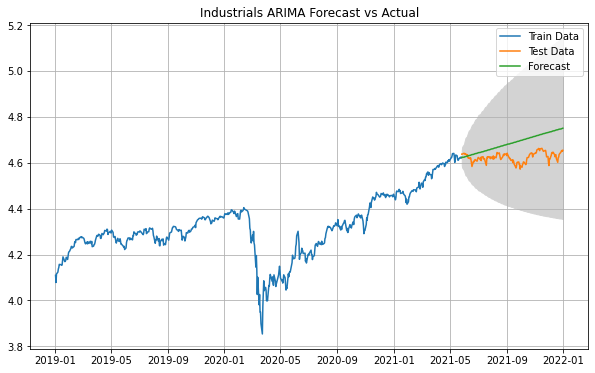

In [40]:
#ARIMA Plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(industrials_train_data, label='Train Data')
plt.plot(industrials_test_data, label='Test Data')
plt.plot(arima_fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='lightgrey')
plt.title('Industrials ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [41]:
# ARIMA Model Statistics
print('Error Statistics for Industrials ARIMA Model')
mse = mean_squared_error(industrials_test_data, arima_forecast)
print('MSE: ' + str(mse))
mae = mean_absolute_error(industrials_test_data, arima_forecast)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(industrials_test_data, arima_forecast))
print('RMSE: '+str(rmse))

Error Statistics for Industrials ARIMA Model
MSE: 0.00524720430221601
MAE: 0.0636712584799091
RMSE: 0.07243758901437851


Facebook Prophet Model

In [42]:
prophet_data = pd.DataFrame()
prophet_data['y'] = df_ch_robinson_log['chrobinson']
prophet_data['ds'] = industrials_sector_pd.index

#train and validation
prophet_train = prophet_data[:int(prophet_data.shape[0]*0.80)]
prophet_test = prophet_data[int(prophet_data.shape[0]*0.80):]

#fit the model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_train)

#predictions
close_prices = prophet_model.make_future_dataframe(periods=212)
forecast = prophet_model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.20406
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2658.95    0.00071038       991.964           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2690.37    0.00478014       3720.45           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2715.76    0.00427074         418.7           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2726.32   0.000923062       763.509           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2732.3   0.000481723       482.217           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [43]:
forecast = forecast.set_index('ds')
forecast = forecast.rename(columns={'yhat':'Prediction'})
forecast = forecast[forecast.index.dayofweek < 5]
forecast = forecast.loc['2021-05-27':'2021-12-31']

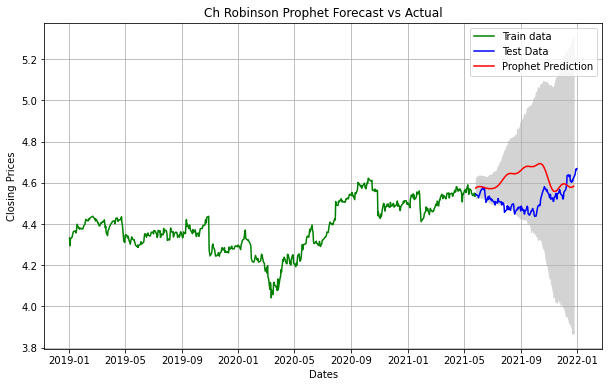

In [44]:
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(ch_robinson_train_data, 'Green', label='Train data')
plt.plot(ch_robinson_test_data, 'blue',  label='Test Data')
plt.plot(forecast['Prediction'], 'Red', label='Prophet Prediction')
plt.fill_between(forecast['yhat_lower'].index, forecast['yhat_lower'], forecast['yhat_upper'], color='lightgrey')
plt.title('Ch Robinson Prophet Forecast vs Actual')
plt.legend()

In [45]:
#Prophet Model Statistics
print('Error Statistics for CH Robinson Prophet Model')
mse = mean_squared_error(ch_robinson_test_data, forecast['Prediction'])
print('Prophet MSE: ' + str(mse))
mae = mean_absolute_error(ch_robinson_test_data, forecast['Prediction'])
print('Prophet MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(ch_robinson_test_data, forecast['Prediction']))
print('Prophet RMSE: '+str(rmse))


Error Statistics for CH Robinson Prophet Model
Prophet MSE: 0.01650300325810074
Prophet MAE: 0.10681329297114417
Prophet RMSE: 0.12846401542105376


In [46]:
prophet_data = pd.DataFrame()
prophet_data['y'] = df_industrials_log['industrial_sector']
prophet_data['ds'] = industrials_sector_pd.index

#preparing data
prophet_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
prophet_train = prophet_data[:int(prophet_data.shape[0]*0.80)]
prophet_test = prophet_data[int(prophet_data.shape[0]*0.80):]

#fit the model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_train)

#predictions
close_prices = prophet_model.make_future_dataframe(periods=212)
forecast = prophet_model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.2818
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2499.04    0.00701387        2602.3           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2559.45    0.00604114       2377.87           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2609.64    0.00252568       1158.22        0.48       0.048      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2652.42    0.00139883       442.319       0.391       0.391      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2662.8   5.12866e-05       193.986           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha   

In [47]:
forecast = forecast.set_index('ds')
forecast = forecast.rename(columns={'yhat':'Prediction'})
forecast = forecast[forecast.index.dayofweek < 5]
forecast = forecast.loc['2021-05-27':'2021-12-31']

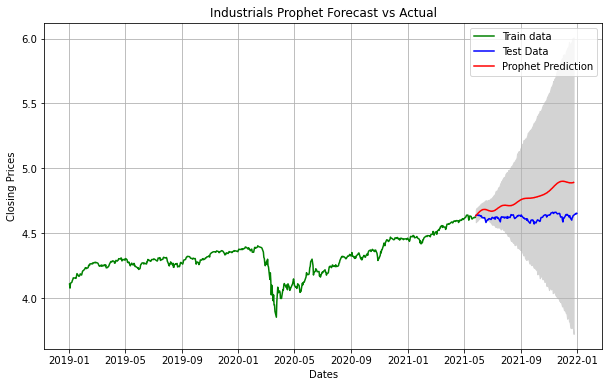

In [48]:
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(industrials_train_data, 'Green', label='Train data')
plt.plot(industrials_test_data, 'blue',  label='Test Data')
plt.plot(forecast['Prediction'], 'Red', label='Prophet Prediction')
plt.fill_between(forecast['yhat_lower'].index, forecast['yhat_lower'], forecast['yhat_upper'], color='lightgrey')
plt.title('Industrials Prophet Forecast vs Actual')
plt.legend()

In [49]:
#Prophet Model Statistics
print('Error Statistics for Industrials Prophet Model')
mse = mean_squared_error(industrials_test_data, forecast['Prediction'])
print('MSE: ' + str(mse))
mae = mean_absolute_error(industrials_test_data, forecast['Prediction'])
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(industrials_test_data, forecast['Prediction']))
print('RMSE: '+str(rmse))

Error Statistics for Industrials Prophet Model
MSE: 0.02658417505443375
MAE: 0.14491450754544
RMSE: 0.1630465426019017
